In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec, colors
import matplotlib.cm as cm

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten, Reshape, BatchNormalization, Activation, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras import backend as K

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
def simple_threshold(im, threshold=.5):
    return ((im > threshold)*im).astype("float32")

In [0]:
batch_size = 128
epochs = 10
img_rows, img_cols = 28, 28

nf = 64
depth = 64+64+64+64
dim = 7

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

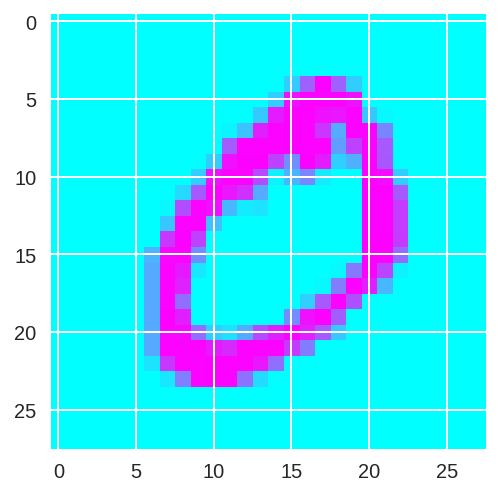

In [5]:
plt.imshow(x_train[1], cmap="cool")

In [6]:
x_train[1].shape

(28, 28)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
print('input_shape =', input_shape)
print('x_train.shape =', x_train.shape)
print('x_test.shape =', x_test.shape)

input_shape = (28, 28, 1)
x_train.shape = (60000, 28, 28, 1)
x_test.shape = (10000, 28, 28, 1)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
model = Sequential()
model.add(Conv2D(nf, 5, padding='same', strides=2, input_shape=input_shape))
model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(Dropout(0.4))
model.add(Conv2D(nf*2, 5, strides=2, padding='same'))
model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(Dropout(0.4))
model.add(Conv2D(nf*4, 5, strides=2, padding='same'))
model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(Dropout(0.4))
model.add(Conv2D(nf*8, 5, strides=1, padding='same'))
model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(2, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(dim*dim*depth, activation='sigmoid'))
model.add(BatchNormalization(momentum=0.9))
model.add(Reshape((dim, dim, depth)))
model.add(Dropout(0.5))
model.add(UpSampling2D())
model.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
model.add(BatchNormalization(momentum=0.9))
model.add(Activation('relu'))
model.add(UpSampling2D())
model.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
model.add(BatchNormalization(momentum=0.9))
model.add(Activation('relu'))
model.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
model.add(BatchNormalization(momentum=0.9))
model.add(Activation('relu'))
model.add(Conv2DTranspose(1, 5, padding='same', activation='sigmoid'))

model.summary()

/usr/local/lib/python3.6/dist-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         819456    
__________

In [0]:
optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)

keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [56]:
history = model.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1820 - acc: 0.7978 - val_loss: 0.1762 - val_acc: 0.7981
Epoch 2/100
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1816 - acc: 0.7979 - val_loss: 0.1839 - val_acc: 0.7961
Epoch 3/100
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1815 - acc: 0.7979 - val_loss: 0.1801 - val_acc: 0.7976
Epoch 4/100
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1812 - acc: 0.7979 - val_loss: 0.2315 - val_acc: 0.7863
Epoch 5/100
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1808 - acc: 0.7980 - val_loss: 0.1740 - val_acc: 0.7988
Epoch 6/100
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1806 - acc: 0.7980 - val_loss: 0.2133 - val_acc: 0.7888
Epoch 7/100
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1809 - acc: 0.7980 - val_loss: 0.1761

In [0]:
pred = model.predict(x_train[:100])

In [0]:
def make_visible_img(float_matrix):
    return (float_matrix*255).astype(int).reshape(28, 28)

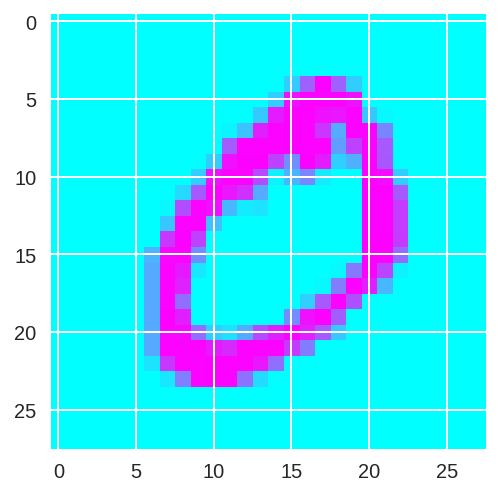

In [59]:
plt.imshow(make_visible_img(x_train[1]),cmap="cool")

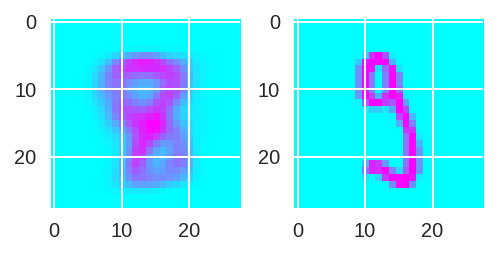

In [161]:
k = 48
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(make_visible_img(x_train[k]),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(make_visible_img(pred[k]),cmap="cool")
plt.show()

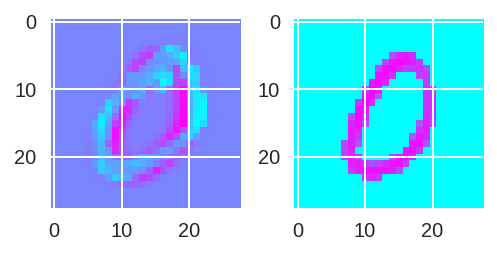

In [61]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(make_visible_img(simple_threshold(pred[k], 0.6)),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(make_visible_img(pred[k]-x_train[k]),cmap="cool")
plt.show()

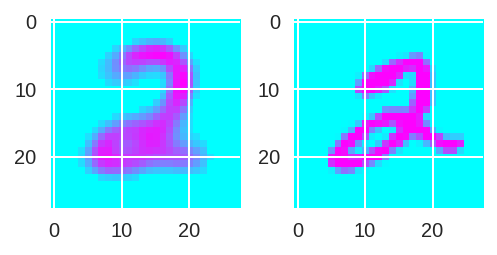

In [62]:
k = 5
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(make_visible_img(x_train[k]),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(make_visible_img(simple_threshold(pred[k], 0.1)),cmap="cool")
plt.show()

In [0]:
from keras import backend as K
# what layer ?
get_image = K.function([model.layers[16].input, K.learning_phase()],
                           [model.layers[-1].output])


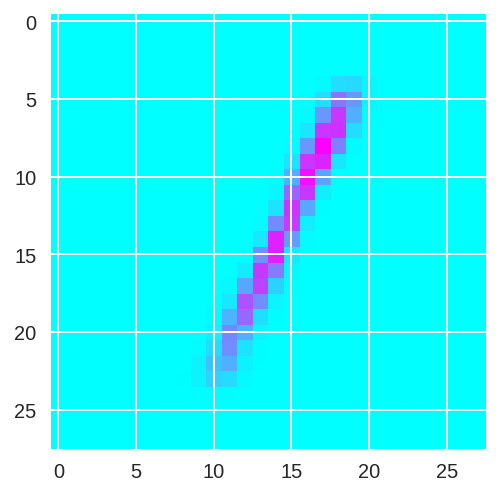

In [64]:
vector = np.array([0.8, .3]).reshape(1,2)
h1 = get_image([vector])[0]
plt.imshow(h1.reshape(28, 28), cmap="cool")

In [0]:
images = [0]*10
vectors = [0]*10
for i in range(10):
    images[i] = [0]*10
    vectors[i] = [0]*10
for f in range(10):
    for j in range(10):
        vectors[f][j] = np.array([f/30+0.3, j/30+0.3])
#         vectors[f][j] = np.array([f/10, j/10])
        images[f][j] = get_image([vectors[f][j].reshape(-1,2)])[0].reshape(28, 28)

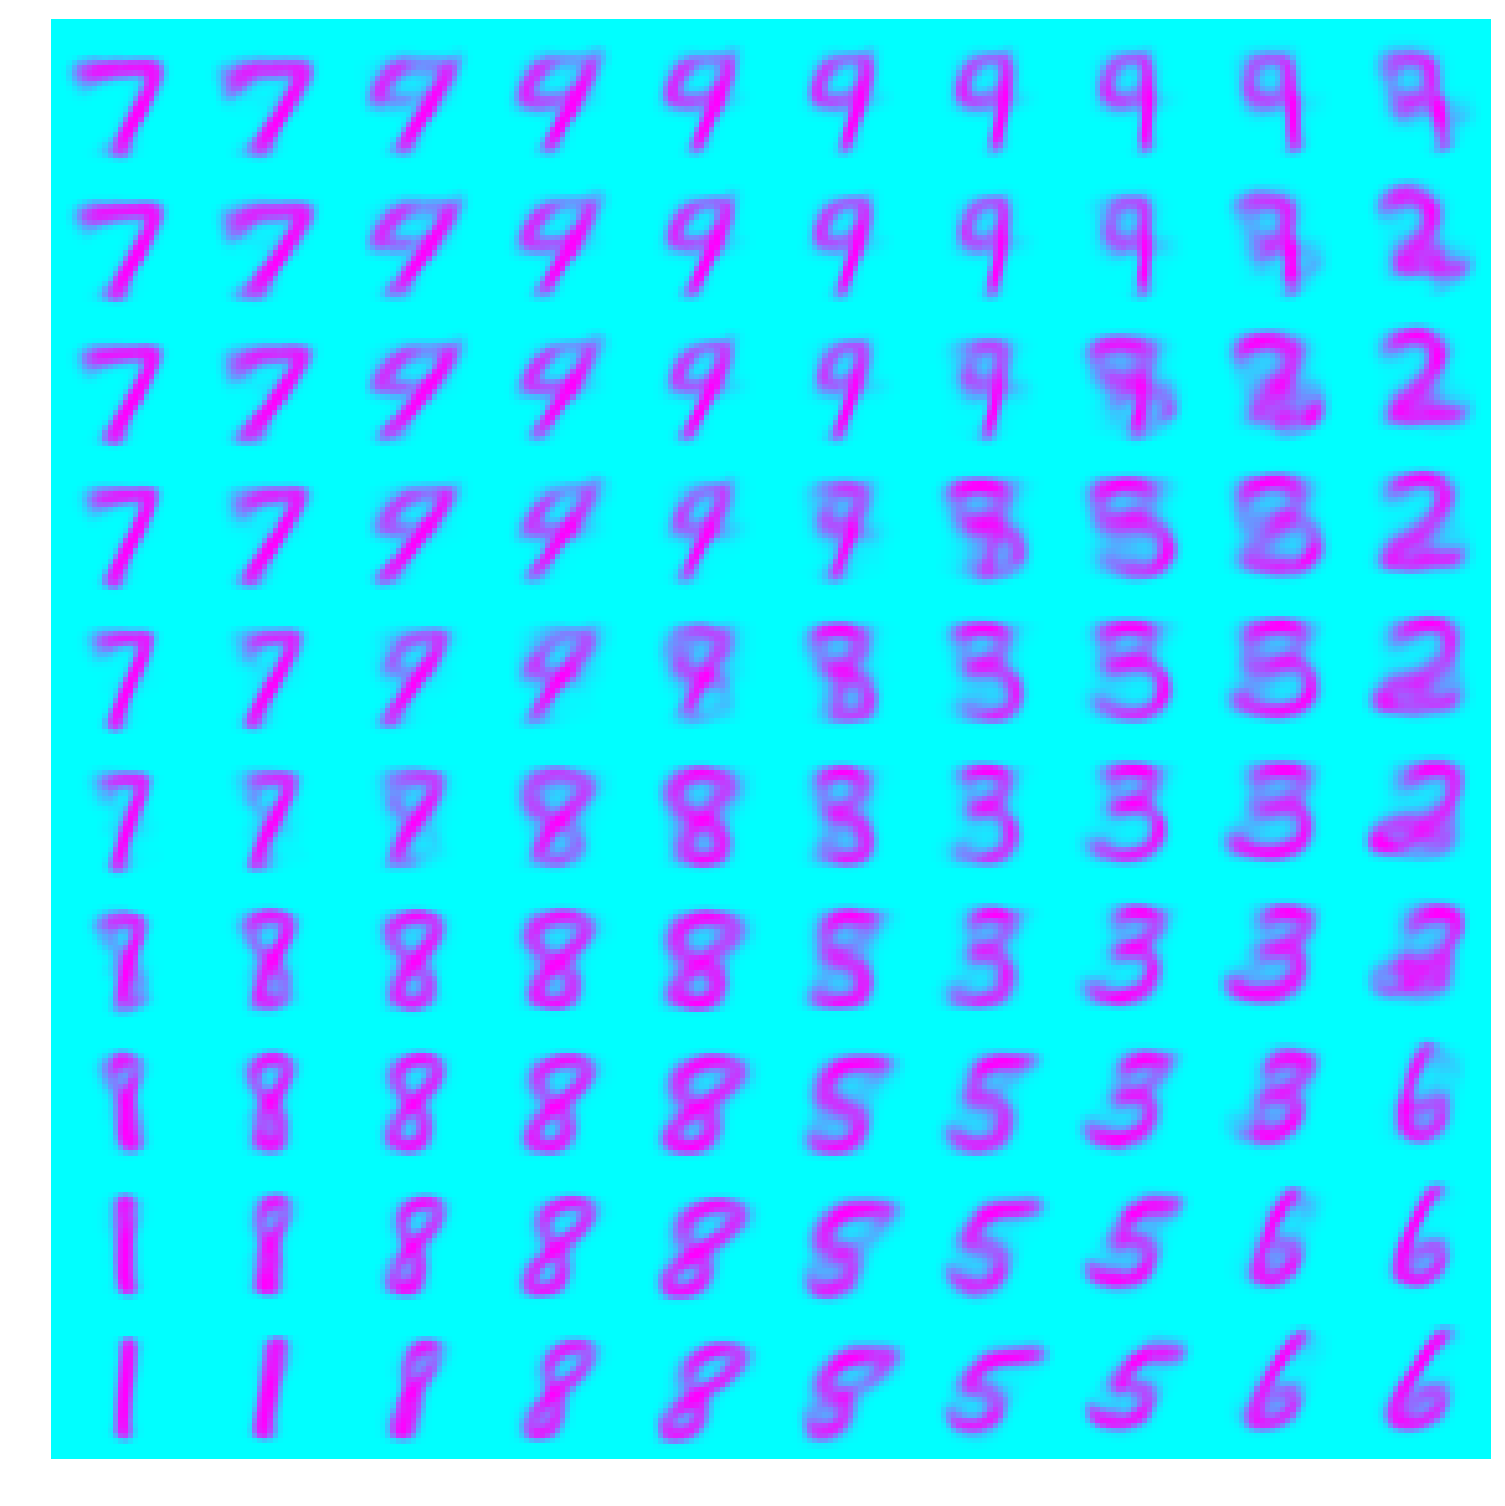

In [113]:
nrow = 10
ncol = 10

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

for i in range(nrow):
    for j in range(ncol):
        im = images[i][j]
        ax= plt.subplot(gs[i,j])
        ax.imshow(im, cmap='cool')
        plt.axis('off')

plt.show()

In [0]:
def get_vector(img):
    func = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[15].output])
    return func([img.reshape(1, 28, 28, 1)])[0]
  
  
def get_vectors(imgs):
    func = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[15].output])
    return func(imgs)[0]

In [90]:
get_vector(x_train[0])

array([[0.50499105, 0.47317386]], dtype=float32)

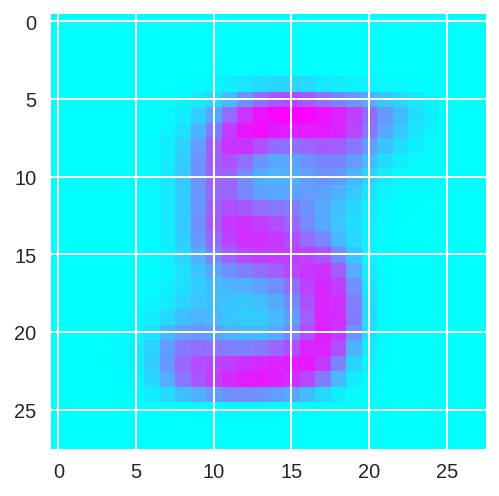

In [92]:
test1 = get_image([get_vector(x_train[0])])[0]
plt.imshow(test1.reshape(28, 28), cmap="cool")

In [0]:
n_points = 10000
vectors_train = get_vectors([x_train[:n_points]])

In [0]:
ys = y_train[:n_points]
(ys==0)
colors = cm.rainbow(np.linspace(0, 1, 10))
# colors

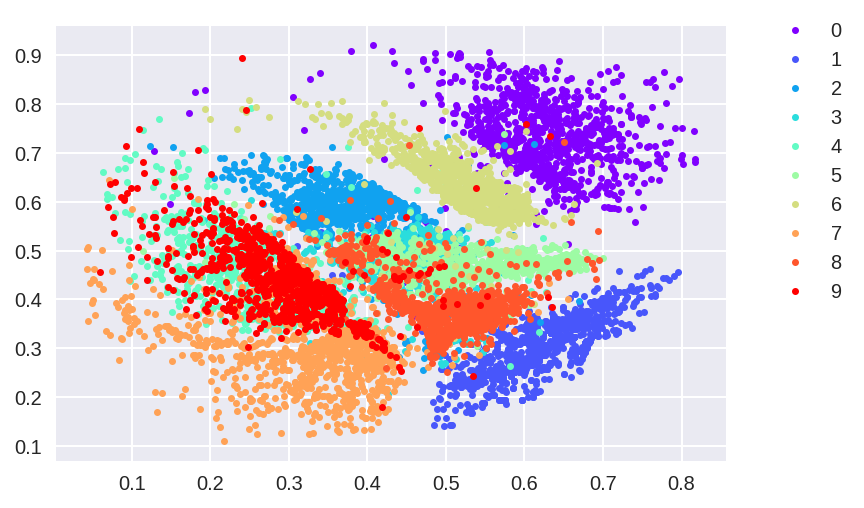

In [170]:
fig = plt.figure()
ax = plt.subplot(111)

for i in range(10):
    idx = (ys==i)
    ax.plot(vectors_train[idx,0], 
            vectors_train[idx, 1], 
            color=colors[i], 
            label=str(i), 
            linestyle='', 
            marker='.')
    
ax.legend(bbox_to_anchor=(1.2, 1.05))

plt.show()

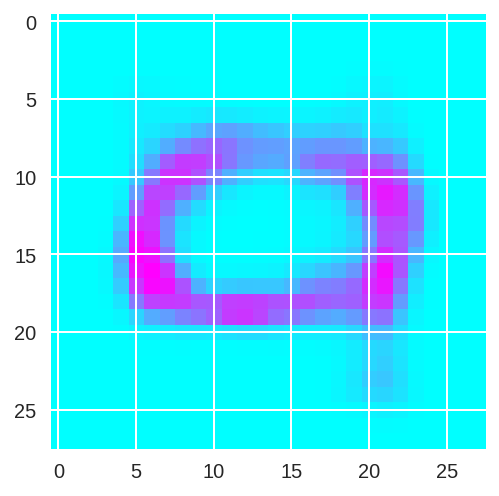

In [165]:
vector = np.array([.1, .9]).reshape(1,2)
h1 = get_image([vector])[0]
plt.imshow(h1.reshape(28, 28), cmap="cool")